In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from natsort import os_sorted
import pickle
import json
import pyabf
black_background = False # black background for slides
if black_background:
    plt.style.use('dark_background')
    
# Import shared_functions
import sys
import os
sys.path.insert(0, str(Path(os.getcwd()).parent))
import shared_functions

C:\Users\tadres\Miniconda3\envs\depol_block_publication\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
#root_path = Path('G:\\My Drive\\PhD\\Odor quality discrimination\\ephys\\analysis')
root_path = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\\ephys')
save_path = 'Declare Path'

Or13a_PA_path = Path(root_path, 'Or13aSF PA\\step stim')

con_to_use = [
    'PA 1uM',
    'PA 100uM',
    'PA 10000uM'
]

# Extract PSTH

In [6]:
start_time = 23 # seconds after OB1 turned on
end_time = 25 # seconds after OB1 turned on

Or13aSF_PA_mean_late, Or13aSF_PA_odor_conc, \
    Or13aSF_PA_std_late, Or13aSF_SEM_late = shared_functions.mean_spike_rate(
    Or13a_PA_path,con_to_use,start_time, end_time)


230000
PA 1uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or13aSF PA\step stim\PA 1uM\Or13aSF PA_PA 1uM.csv
PA 100uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or13aSF PA\step stim\PA 100uM\Or13aSF PA_PA 100uM.csv
PA 10000uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or13aSF PA\step stim\PA 10000uM\Or13aSF PA_PA 10000uM.csv


<IPython.core.display.Javascript object>


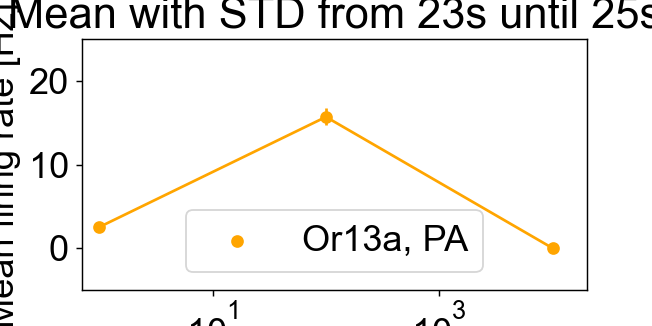

Text(0.5, 1.0, 'Mean with STD from 23s until 25s')

In [7]:
fig = plt.figure(figsize = (5,2.5))
ax = fig.add_subplot(111)

# plot Or42b EtB"""
conc_Or13a_PA_beg = []
for i in range(len(Or13aSF_PA_odor_conc)):
    conc_Or13a_PA_beg.append(float((Or13aSF_PA_odor_conc[i]).split('uM')[0].split(' ')[-1])/1)
    if i == 0:
        ax.scatter(conc_Or13a_PA_beg[i], Or13aSF_PA_mean_late[i], color = 'orange', label = 'Or13a, PA')
    else:
        ax.scatter(conc_Or13a_PA_beg[i], Or13aSF_PA_mean_late[i], color = 'orange')
ax.errorbar(conc_Or13a_PA_beg, Or13aSF_PA_mean_late, yerr=Or13aSF_SEM_late, color='orange')

ax.set_xlim(0.7, 20000)
ax.set_ylim(-5,25)
 
ax.set_xscale('log')
ax.set_ylabel('Mean firing rate [Hz]')
ax.set_xlabel('Concentration [uM]')
ax.legend()
ax.set_title('Mean with STD from ' + repr(start_time) + 's until ' + repr(end_time) +'s')
fig.savefig(Path(save_path, 'Fig4H_Or13a_PA_Dose_response_late_YHIGH.svg'))

# Plot example trace

<IPython.core.display.Javascript object>


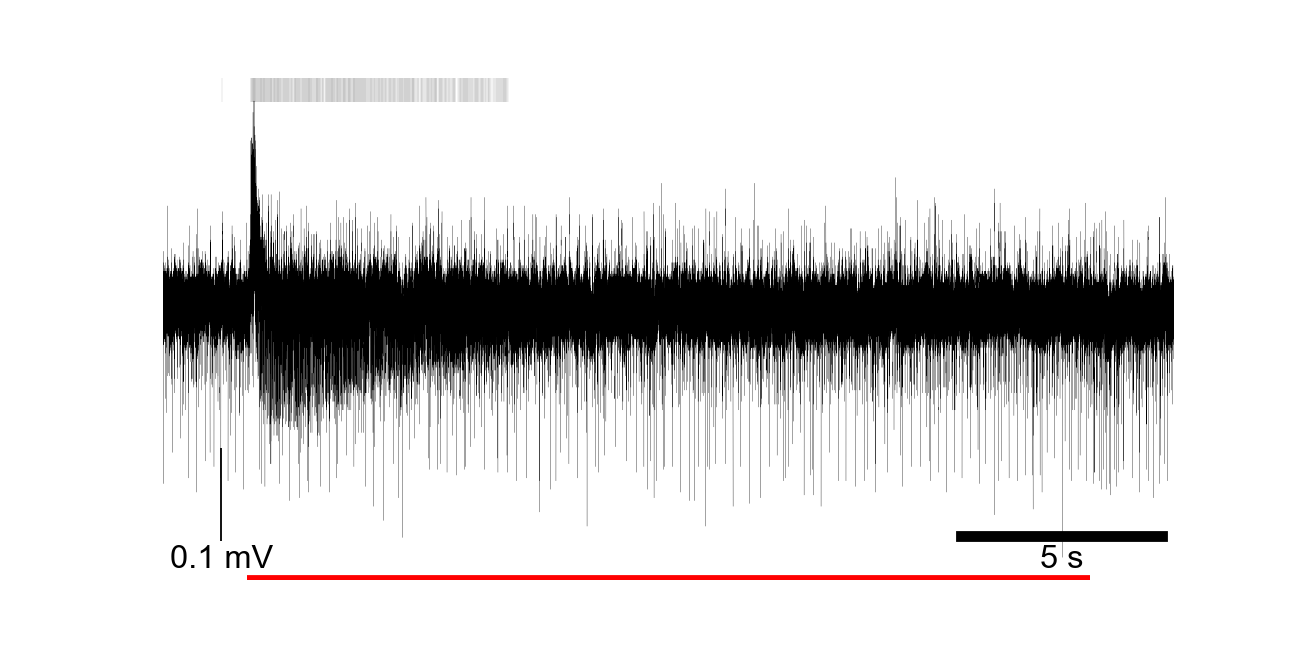

In [9]:
current_path = Path(root_path, 'Or13aSF PA\\step stim\\PA 10000uM\\20220131_11-30-57_pCh2_Ch1_PA10mM_200mbar')

shared_functions.collect_and_plot_ephys_traces(current_path, 'Fig4H_Or13aSF_PA1000uM_example.pdf', 
                                               save_path,  #ylim=(-0.3,0.5),
                                               rasterplot_linethickness=0.05,
                                               #detailed_x1 = (start_phasic_100uM, end_phasic_100uM), detailed_x1_color = 'navy',
                                               #detailed_x2 = (start_tonic_100uM, end_tonic_100uM), detailed_x2_color = 'cyan',
                                               odor_color='red'
                                              )